In [1]:
# @title Import Library
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy import stats

In [2]:
# @title Import Dataset
# Load the dataset
df = pd.read_csv("marketing_campaign.csv", sep='\t')

# Display the first few rows of the dataset
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
# @title Identifying Data

# Dataset size
print('Data points and Columns:', df.shape)

# Dataset information
print(df.info())

# Check for null values
print('Null Values:', (df.isnull().sum()))

# Check for duplicate values
print('Duplicate Values:', (df.duplicated().sum()))

# Summarize the dataset
print('Dataset Summary:')
df.describe().T

Data points and Columns: (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  Nu

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


Based on the initial data exploration, we find out that;


*   The dataset has 29 columns consisting 2,240 observations.

*   Most of the columns are numerical.

*   There are three categorical columns; 'marital_status', 'education', and 'Dt_customer'.

*   The 'marital_status' and 'education' columns contain categories that can be considered synonymous.

*   'Dt_customer' needs to be converted to a numerical date type.

*   The 'income' column has 24 missing values.

*   We did not detect any duplicate entries.

*   Some outliers are present in some numerical columns.

In [4]:
# @title Data Engineering
print("Number of unique values in Z_CostContact column:", df['Z_CostContact'].nunique())
print("Number of unique values in Z_Revenue column:", df["Z_Revenue"].nunique())

# Remove unnecessary columns ('Id' and columns with 1 unique value)
df.drop(['ID', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

# Standardize 'Marital_Status' into 2 broader groups
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'], 'Partner')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'], 'Single')

# Standardize 'Education' into 3 broader groups
df['Education'] = df['Education'].replace(['PhD', 'Master'], 'Postgraduate')
df['Education'] = df['Education'].replace(['2n Cycle', 'Graduation'], 'Graduate')
df['Education'] = df['Education'].replace(['Basic'], 'Undergraduate')

# Define categorical_columns here
categorical_columns = ['Education', 'Marital_Status']

for column in categorical_columns:
    print(f"Unique values in {column}:")
    print(df[column].unique())
    print("\n")

# Combining columns together to reduce the number of dimensions
df['Kids'] = df['Kidhome'] + df['Teenhome']
df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']
df['TotalNumPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

# Converting date to numerical variable by calculating duration
data = df.copy()

# Calculate 'Days_as_client' before selecting columns
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
latest_date = df['Dt_Customer'].max()
df['Days_as_client'] = (latest_date - df['Dt_Customer']).dt.days
df.head()

df = df[['Education', 'Marital_Status', 'Income', 'Kids', 'Days_as_client', 'Recency', 'Expenses',
         'TotalNumPurchases', 'TotalAcceptedCmp', 'Complain', 'Response']]


Number of unique values in Z_CostContact column: 1
Number of unique values in Z_Revenue column: 1
Unique values in Education:
['Graduate' 'Postgraduate' 'Undergraduate']


Unique values in Marital_Status:
['Single' 'Partner']




In [5]:
# @title Data Cleaning

# Remove duplicate rows from the DataFrame
df.drop_duplicates(inplace=True)

# Remove rows with any missing values (NaN)
df.dropna(inplace=True)

df.shape

# Categorize columns into three groups based on their data type

binary_columns = [col for col in df.columns if df[col].nunique() == 2]
categorical_columns = [col for col in df.columns if 2 < df[col].nunique() < 10]
numerical_columns = [col for col in df.select_dtypes(include=['number']).columns
                     if col not in binary_columns + categorical_columns]

## Detecting Outliers

# Calculate the z-scores for each column
z_scores = pd.DataFrame(stats.zscore(df[numerical_columns]), columns=numerical_columns)

# Generate descriptive statistics for the z-scores
print("Descriptive Statistics for Z-Scores before Outliers Removal")
display(z_scores.describe().round(3))

Descriptive Statistics for Z-Scores before Outliers Removal


<ipython-input-5-36fd396c9e86>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)
<ipython-input-5-36fd396c9e86>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


,Income,Days_as_client,Recency,Expenses,TotalNumPurchases
count,2031.000,2031.000,2031.000,2031.000,2031.000
mean,0.000,0.000,0.000,0.000,0.000
std,1.000,1.000,1.000,1.000,1.000
min,-1.984,-1.743,-1.688,-0.999,-1.945
25%,-0.660,-0.863,-0.859,-0.893,-0.900
50%,-0.032,-0.003,0.004,-0.350,0.014
75%,0.634,0.867,0.867,0.729,0.797
max,24.058,1.713,1.730,3.176,3.801


In the context of income data, a Z-score of 24 suggests that this particular income is 24 standard deviations away from the mean, which is extraordinarily high. Such an extreme value is not only an outlier but may also represent a rare event or a data entry error.

Removing these outliers will help ensure the integrity of the statistical analysis. Doing so, we can enhance the reliability of our clustering results, leading to more accurate insights and conclusions.

In [6]:
# @title Removing missing values
# Check for missing values
df.isnull().sum()

# Drop rows with missing values (if any)
df = df.dropna()

In [7]:
# @title Data Cleaning - Removing Outliers

# Identify rows where any of the z-scores exceed the threshold
outliers = z_scores[(np.abs(z_scores) > 3).any(axis=1)]

# Drop the rows containing outliers
df = df.drop(outliers.index)

# Encode categorical variables
df = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=True)

# Scale the features
features = df.drop(columns=[])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

Throughout the Data Cleaning and Feature Engineering process, several important actions were taken:

We developed a new feature that indicates the number of days each client has been with the company.
Extraneous features were eliminated to make the dataset more efficient.
The 'Marital_Status' and 'Education' variables were grouped into fewer, broader categories for consistency.
Certain columns were merged to decrease the total number of columns in the dataset.
Outliers were detected and removed to enhance the overall quality of the data.
These steps were crucial for optimizing the dataset for analysis and ensuring its accuracy and relevance.

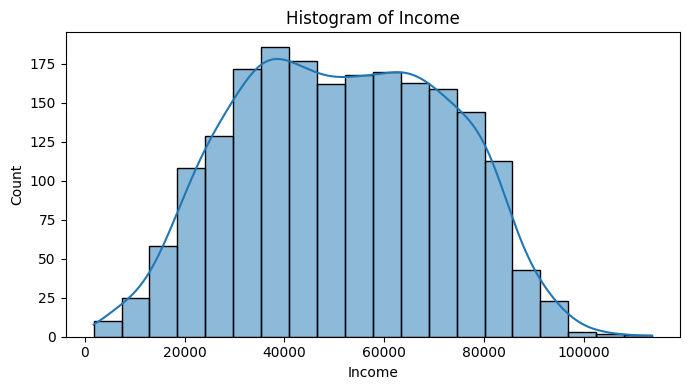

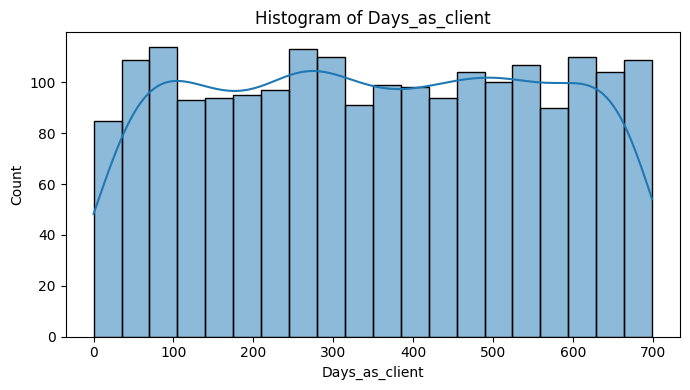

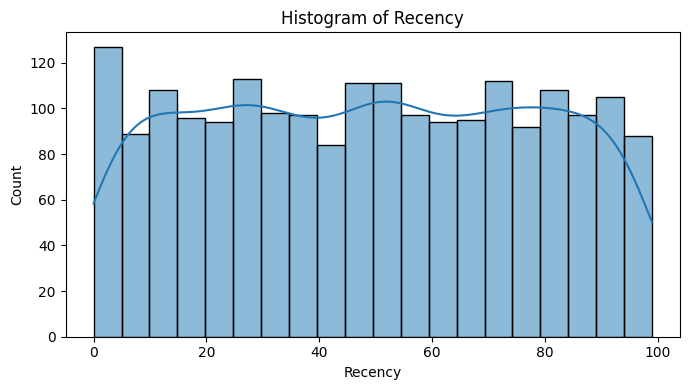

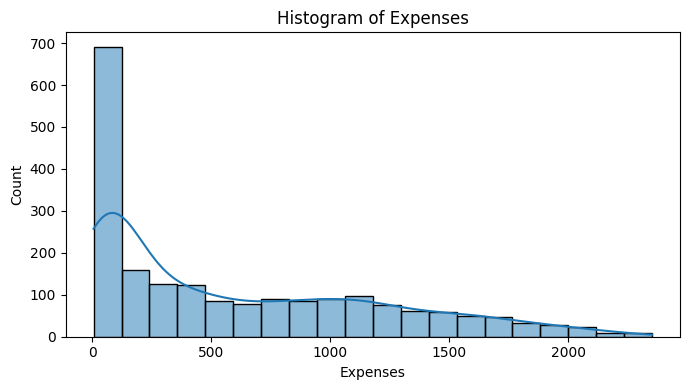

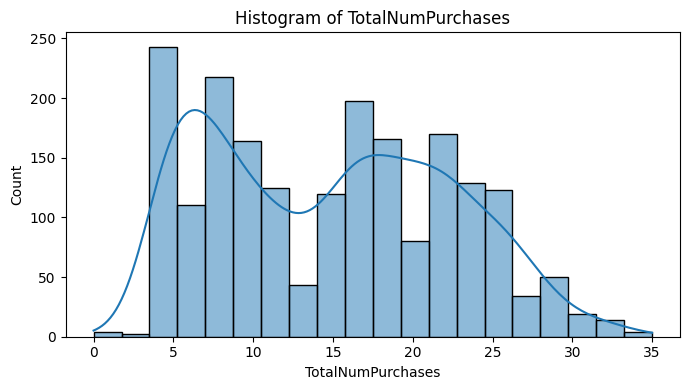

In [8]:
# @title Exploratory Data Analysis

# Plot histograms for each numerical column
for column in numerical_columns:

    plt.figure(figsize=(7, 4))
    sns.histplot(data=df, x=column, kde=True, bins=20)
    plt.title(f'Histogram of {column}')

    plt.tight_layout()
    plt.show()

<ipython-input-9-8477a280a8f5>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette=custom_palette)
<ipython-input-9-8477a280a8f5>:12: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(data=df, x=column, palette=custom_palette)


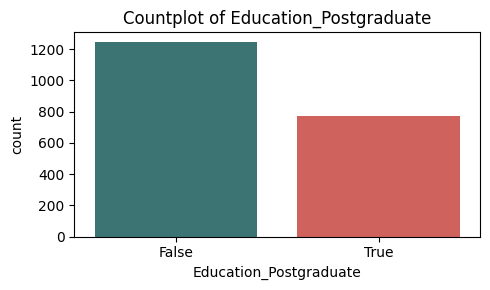

<ipython-input-9-8477a280a8f5>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette=custom_palette)
<ipython-input-9-8477a280a8f5>:12: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(data=df, x=column, palette=custom_palette)


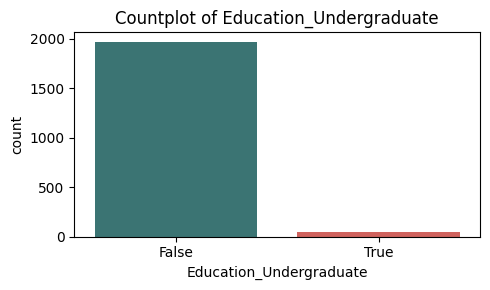

<ipython-input-9-8477a280a8f5>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette=custom_palette)
<ipython-input-9-8477a280a8f5>:12: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(data=df, x=column, palette=custom_palette)


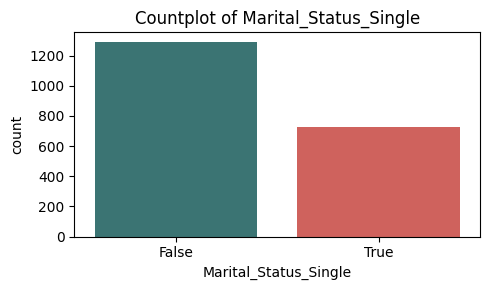

<ipython-input-9-8477a280a8f5>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette=custom_palette)
<ipython-input-9-8477a280a8f5>:12: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df, x=column, palette=custom_palette)


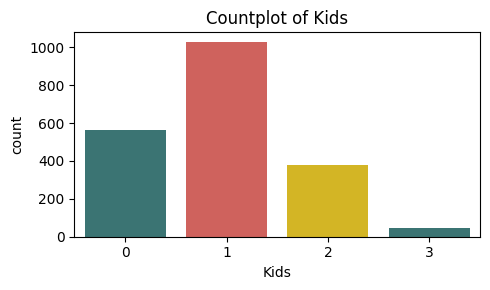

<ipython-input-9-8477a280a8f5>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette=custom_palette)
<ipython-input-9-8477a280a8f5>:12: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(data=df, x=column, palette=custom_palette)


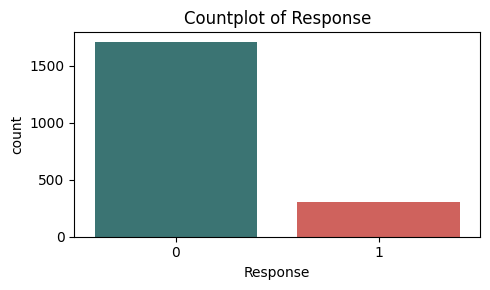

<ipython-input-9-8477a280a8f5>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette=custom_palette)
<ipython-input-9-8477a280a8f5>:12: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(data=df, x=column, palette=custom_palette)


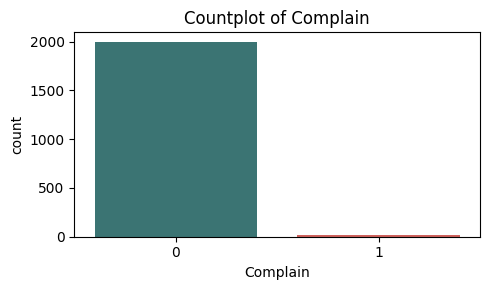

In [9]:
# @title Countplots for categorical column
# Define the color palette
custom_palette = ["#327D7C", "#E2504A", "#F0C808"]

# Define the columns to plot
columns_to_plot = ['Education_Postgraduate', 'Education_Undergraduate',
                      'Marital_Status_Single', 'Kids', 'Response', 'Complain']

# Plot countplots for each categorical column
for column in columns_to_plot:  # Directly iterate over the list
    plt.figure(figsize=(5, 3))
    sns.countplot(data=df, x=column, palette=custom_palette)
    plt.title(f'Countplot of {column}')

    plt.tight_layout()
    plt.show()

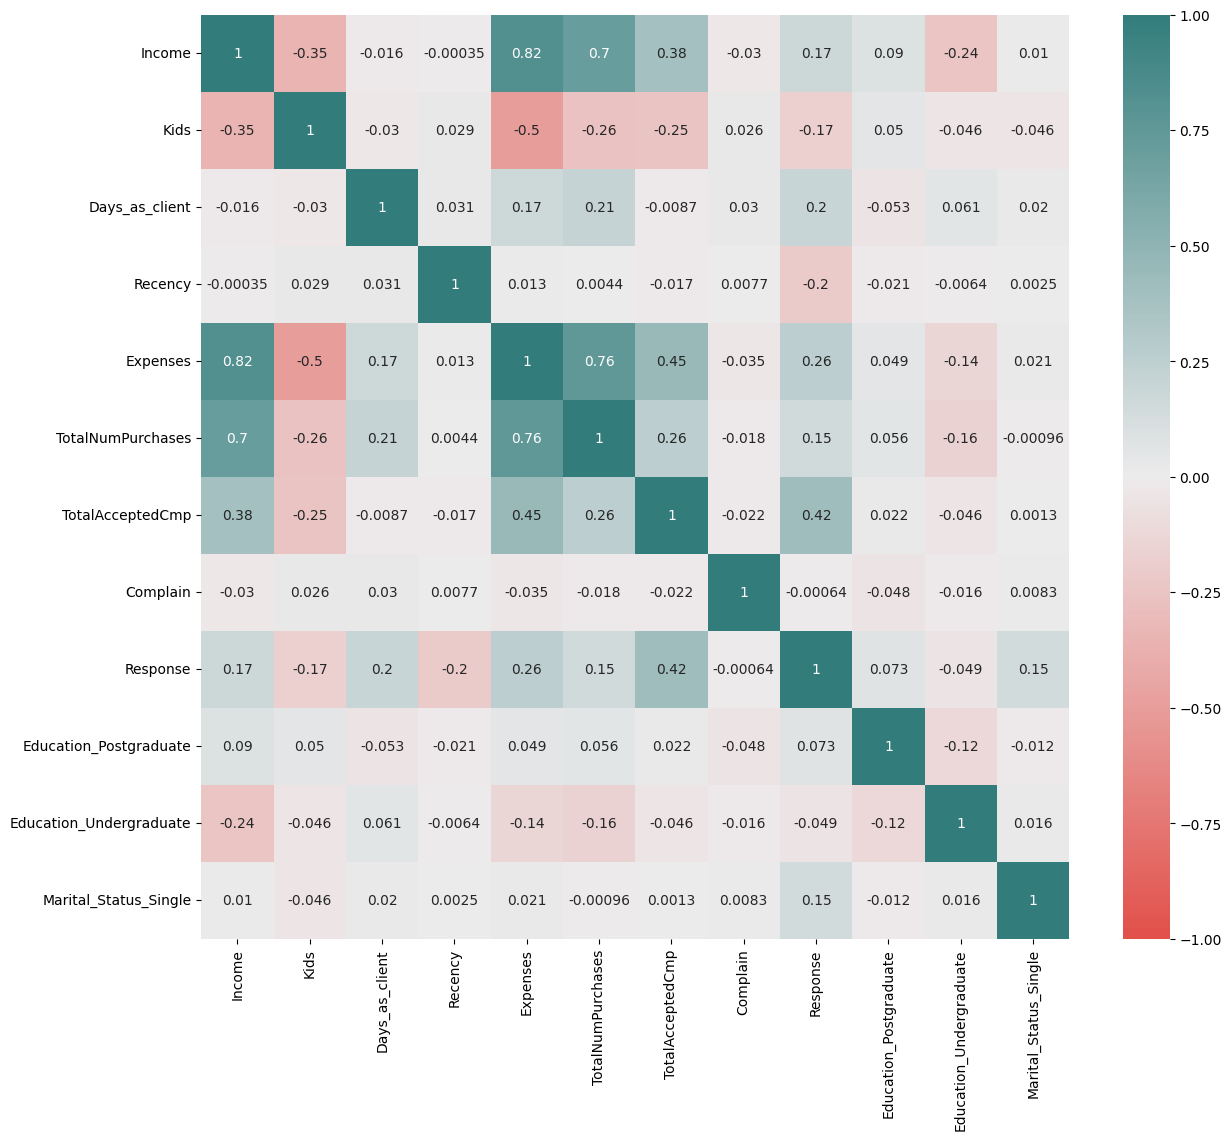

In [10]:
# @title Correlation Matrix
# Import necessary modules
import matplotlib.colors
from matplotlib.colors import LinearSegmentedColormap
# Define the custom colormap
colors = ["#E2504A", "#EDEBEC", "#327D7C"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

# Example correlation matrix
corr_df= df.corr(numeric_only=True)

# Plotting the heatmap
plt.figure(figsize=(14,12))
sns.heatmap(corr_df, cmap=cmap, center=0, vmin=-1, annot=True)
plt.show()

Key Insights from the Visualizations:  


*   After filtering out outliers, income exhibits a normal distribution. This indicates that most customers have earnings close to the average, with fewer individuals at the higher and lower extremes.  
*   Both variables display a relatively uniform distribution, suggesting that customers have been associated with the company for diverse durations and have engaged with it over a broad time span.
*   The distribution of expenses follows an exponential trend, meaning most customers spend relatively little, and the number of high spenders decreases rapidly as expenditure increases.
*   This metric aligns with a binomial distribution, reflecting common purchasing patterns where customers tend to make a specific number of transactions.
*   A significant proportion of customers are graduates, have one child, are in a relationship, have not submitted complaints in the last two years, and have not participated in past promotional campaigns. This suggests the company serves a well-defined customer segment.
*   Income, expenses, and total purchases show strong correlations, implying that individuals with higher incomes tend to spend more and make more purchases.

In [11]:
# @title Dimensionality Reduction
# Apply PCA
from sklearn.decomposition import PCA # Import the PCA class
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_features, columns=['PC1', 'PC2'])

In [12]:
# @title Hierarchical Clustering Parameter Tuning

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Define range of clusters to test
n_clusters_range = range(2, 10)  # Test 2 to 9 clusters
linkage_methods = ['ward', 'complete', 'average', 'single']  # Linkage methods to test

# Store results
best_score = -1
best_params = {}

# Grid search for best parameters
for n_clusters in n_clusters_range:
    for linkage in linkage_methods:
        agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        # Use scaled_features instead of processed_data
        labels = agglo.fit_predict(scaled_features)

        # Silhouette score requires at least 2 clusters
        if len(np.unique(labels)) > 1:
            # Use scaled_features instead of processed_data
            score = silhouette_score(scaled_features, labels)
            print(f"n_clusters: {n_clusters}, linkage: {linkage}, Silhouette Score: {score:.3f}")

            # Track the best parameters
            if score > best_score:
                best_score = score
                best_params = {'n_clusters': n_clusters, 'linkage': linkage}

print(f"\nBest Parameters: {best_params}, Best Silhouette Score: {best_score:.3f}")




"""
# Perform hierarchical clustering
linked = linkage(scaled_features, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3)
df['Hierarchical_Cluster'] = agglo.fit_predict(scaled_features)

# Plot the clusters
plt.figure(figsize=(10, 6))
# Concatenate pca_df with the 'Hierarchical_Cluster' column from df
plot_df = pd.concat([pca_df, df['Hierarchical_Cluster']], axis=1)
sns.scatterplot(x='PC1', y='PC2', hue='Hierarchical_Cluster', data=plot_df, palette='viridis') # Use plot_df for plotting
plt.title('Hierarchical Clustering')
plt.show()
"""

n_clusters: 2, linkage: ward, Silhouette Score: 0.169
n_clusters: 2, linkage: complete, Silhouette Score: 0.598
n_clusters: 2, linkage: average, Silhouette Score: 0.598
n_clusters: 2, linkage: single, Silhouette Score: 0.598
n_clusters: 3, linkage: ward, Silhouette Score: 0.181
n_clusters: 3, linkage: complete, Silhouette Score: 0.460
n_clusters: 3, linkage: average, Silhouette Score: 0.460
n_clusters: 3, linkage: single, Silhouette Score: 0.460
n_clusters: 4, linkage: ward, Silhouette Score: 0.186
n_clusters: 4, linkage: complete, Silhouette Score: 0.287
n_clusters: 4, linkage: average, Silhouette Score: 0.457
n_clusters: 4, linkage: single, Silhouette Score: 0.457
n_clusters: 5, linkage: ward, Silhouette Score: 0.189
n_clusters: 5, linkage: complete, Silhouette Score: 0.171
n_clusters: 5, linkage: average, Silhouette Score: 0.318
n_clusters: 5, linkage: single, Silhouette Score: 0.456
n_clusters: 6, linkage: ward, Silhouette Score: 0.201
n_clusters: 6, linkage: complete, Silhouette S

"\n# Perform hierarchical clustering\nlinked = linkage(scaled_features, method='ward')\n\n# Plot the dendrogram\nplt.figure(figsize=(10, 6))\ndendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)\nplt.title('Hierarchical Clustering Dendrogram')\nplt.show()\n\n# Apply Agglomerative Clustering\nagglo = AgglomerativeClustering(n_clusters=3)\ndf['Hierarchical_Cluster'] = agglo.fit_predict(scaled_features)\n\n# Plot the clusters\nplt.figure(figsize=(10, 6))\n# Concatenate pca_df with the 'Hierarchical_Cluster' column from df\nplot_df = pd.concat([pca_df, df['Hierarchical_Cluster']], axis=1)\nsns.scatterplot(x='PC1', y='PC2', hue='Hierarchical_Cluster', data=plot_df, palette='viridis') # Use plot_df for plotting\nplt.title('Hierarchical Clustering')\nplt.show()\n"

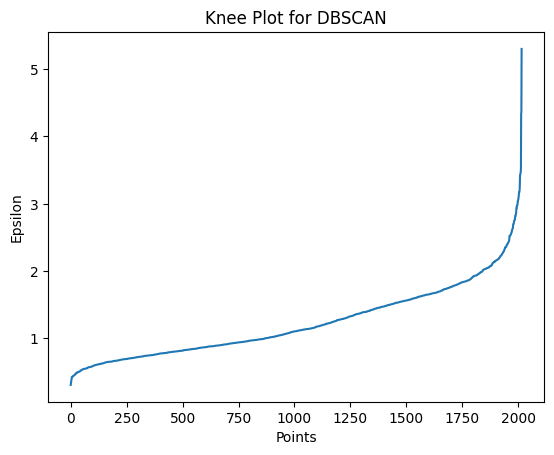

eps: 0.20, min_samples: 2, Silhouette Score: -0.358
eps: 0.20, min_samples: 3, Silhouette Score: -0.168
eps: 0.30, min_samples: 2, Silhouette Score: -0.474
eps: 0.30, min_samples: 3, Silhouette Score: -0.241
eps: 0.30, min_samples: 4, Silhouette Score: -0.191
eps: 0.40, min_samples: 2, Silhouette Score: -0.431
eps: 0.40, min_samples: 3, Silhouette Score: -0.385
eps: 0.40, min_samples: 4, Silhouette Score: -0.263
eps: 0.40, min_samples: 5, Silhouette Score: -0.190
eps: 0.40, min_samples: 6, Silhouette Score: -0.165
eps: 0.50, min_samples: 2, Silhouette Score: -0.346
eps: 0.50, min_samples: 3, Silhouette Score: -0.372
eps: 0.50, min_samples: 4, Silhouette Score: -0.355
eps: 0.50, min_samples: 5, Silhouette Score: -0.264
eps: 0.50, min_samples: 6, Silhouette Score: -0.262
eps: 0.50, min_samples: 7, Silhouette Score: -0.177
eps: 0.50, min_samples: 8, Silhouette Score: -0.177
eps: 0.60, min_samples: 2, Silhouette Score: -0.278
eps: 0.60, min_samples: 3, Silhouette Score: -0.338
eps: 0.60, m

"\n# Apply DBSCAN\ndbscan = DBSCAN(eps=0.5, min_samples=5)\ndf['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_features)\n\n# Plot the clusters\nplt.figure(figsize=(10, 6))\n# Concatenate pca_df with the 'DBSCAN_Cluster' column from df\nplot_df = pd.concat([pca_df, df['DBSCAN_Cluster']], axis=1)\nsns.scatterplot(x='PC1', y='PC2', hue='DBSCAN_Cluster', data=plot_df, palette='viridis') # Use the concatenated DataFrame\nplt.title('DBSCAN Clustering')\nplt.show()\n"

In [13]:
# @title DBSCAN Parameter Tuning
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Use scaled_features instead of processed_data
processed_data = scaled_features

# Find optimal eps using the knee method
nn = NearestNeighbors(n_neighbors=5).fit(processed_data)
distances, _ = nn.kneighbors(processed_data)
distances = np.sort(distances[:, -1])

# Plot distances to find the "knee"
plt.plot(distances)
plt.xlabel('Points')
plt.ylabel('Epsilon')
plt.title('Knee Plot for DBSCAN')
plt.show()

# Grid search for best parameters
best_score = -1
best_eps = 0.5  # Start with a value from the knee plot
best_min_samples = 5

for eps in np.linspace(0.1, 1.0, 10):  # Test eps values from 0.1 to 1.0
    for min_samples in range(2, 10):  # Test min_samples from 2 to 9
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(processed_data)

        # Silhouette score requires at least 2 clusters
        if len(np.unique(labels)) > 1:
            score = silhouette_score(processed_data, labels)
            print(f"eps: {eps:.2f}, min_samples: {min_samples}, Silhouette Score: {score:.3f}")

            # Track the best parameters
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

print(f"\nBest eps: {best_eps:.2f}, Best min_samples: {best_min_samples}, Best Silhouette Score: {best_score:.3f}")


"""
# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_features)

# Plot the clusters
plt.figure(figsize=(10, 6))
# Concatenate pca_df with the 'DBSCAN_Cluster' column from df
plot_df = pd.concat([pca_df, df['DBSCAN_Cluster']], axis=1)
sns.scatterplot(x='PC1', y='PC2', hue='DBSCAN_Cluster', data=plot_df, palette='viridis') # Use the concatenated DataFrame
plt.title('DBSCAN Clustering')
plt.show()
"""

In [14]:
# @title KMeans Parameter Tuning
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Define range of clusters to test
n_clusters_range = range(2, 10)  # Test 2 to 9 clusters

# Store results
best_score = -1
best_n_clusters = 2

# Grid search for best parameters
for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(processed_data)

    # Silhouette score requires at least 2 clusters
    if len(np.unique(labels)) > 1:
        score = silhouette_score(processed_data, labels)
        print(f"n_clusters: {n_clusters}, Silhouette Score: {score:.3f}")

        # Track the best parameters
        if score > best_score:
            best_score = score
            best_n_clusters = n_clusters

print(f"\nBest n_clusters: {best_n_clusters}, Best Silhouette Score: {best_score:.3f}")

n_clusters: 2, Silhouette Score: 0.204
n_clusters: 3, Silhouette Score: 0.180
n_clusters: 4, Silhouette Score: 0.124
n_clusters: 5, Silhouette Score: 0.149
n_clusters: 6, Silhouette Score: 0.153
n_clusters: 7, Silhouette Score: 0.163
n_clusters: 8, Silhouette Score: 0.155
n_clusters: 9, Silhouette Score: 0.149

Best n_clusters: 2, Best Silhouette Score: 0.204


In [15]:
# @title Analyzing the Clusters
# Compare best results
print("Best Hierarchical Clustering Parameters:", best_params)
print("Best DBSCAN Parameters: eps =", best_eps, ", min_samples =", best_min_samples)
print("Best KMeans Parameters: n_clusters =", best_n_clusters)

# Fit the best models
best_agglo = AgglomerativeClustering(n_clusters=best_params['n_clusters'], linkage=best_params['linkage'])
best_dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
best_kmeans = KMeans(n_clusters=best_n_clusters, random_state=42)

# Fit and predict
agglo_labels = best_agglo.fit_predict(processed_data)
dbscan_labels = best_dbscan.fit_predict(processed_data)
kmeans_labels = best_kmeans.fit_predict(processed_data)

# Evaluate final models
print("\nHierarchical Clustering Silhouette Score:", silhouette_score(processed_data, agglo_labels))
print("DBSCAN Silhouette Score:", silhouette_score(processed_data, dbscan_labels))
print("KMeans Silhouette Score:", silhouette_score(processed_data, kmeans_labels))



"""
# Analyze DBSCAN clusters
print(df['DBSCAN_Cluster'].value_counts())

# Analyze Hierarchical clusters
print(df['Hierarchical_Cluster'].value_counts())

# Analyze GMM clusters
print(df['GMM_Cluster'].value_counts())
"""

Best Hierarchical Clustering Parameters: {'n_clusters': 2, 'linkage': 'complete'}
Best DBSCAN Parameters: eps = 0.6 , min_samples = 9
Best KMeans Parameters: n_clusters = 2

Hierarchical Clustering Silhouette Score: 0.5980138374971171
DBSCAN Silhouette Score: -0.15514851026678303
KMeans Silhouette Score: 0.20411433475745702


"\n# Analyze DBSCAN clusters\nprint(df['DBSCAN_Cluster'].value_counts())\n\n# Analyze Hierarchical clusters\nprint(df['Hierarchical_Cluster'].value_counts())\n\n# Analyze GMM clusters\nprint(df['GMM_Cluster'].value_counts())\n"

               Income      Kids  Days_as_client    Recency    Expenses  \
Cluster                                                                  
0        51708.309619  0.951904      351.955411  48.858216  604.665331   
1        45554.500000  1.150000      413.350000  51.100000  392.550000   

         TotalNumPurchases  TotalAcceptedCmp  Complain  Response  \
Cluster                                                            
0                14.859218          0.300601       0.0  0.152305   
1                13.500000          0.150000       1.0  0.150000   

         Education_Postgraduate  Education_Undergraduate  \
Cluster                                                    
0                       0.38477                 0.024549   
1                       0.15000                 0.000000   

         Marital_Status_Single  
Cluster                         
0                     0.359719  
1                     0.400000  


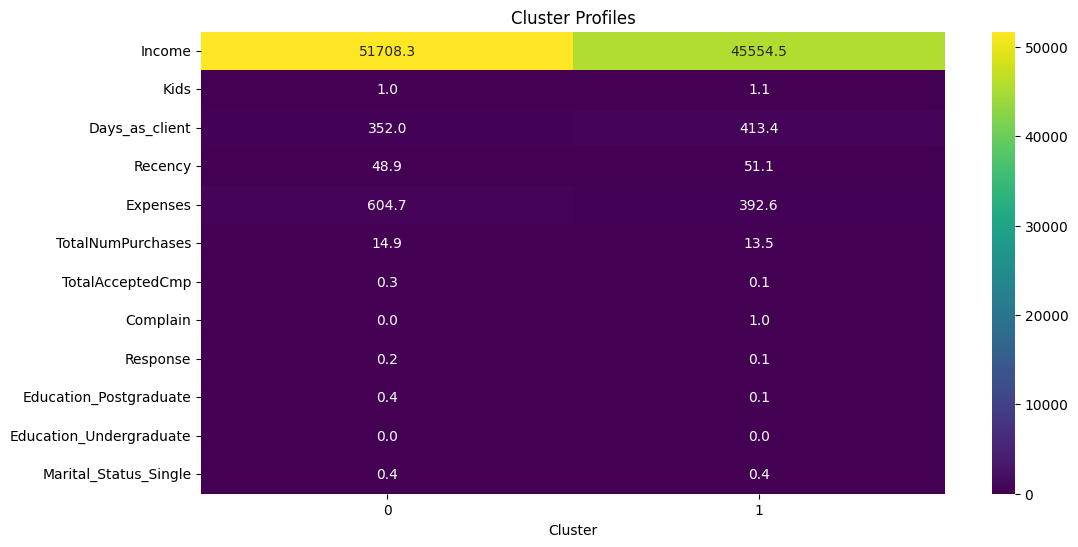

In [16]:
# @title Interpret the Best Clusters
# Add the best cluster labels to the original dataframe
df['Cluster'] = agglo_labels  # Use the labels from the best-performing model

# Group by cluster and calculate mean values
cluster_profile = df.groupby('Cluster').mean()

# Display the cluster profiles
print(cluster_profile)

# Visualize cluster profiles
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_profile.T, cmap='viridis', annot=True, fmt=".1f")
plt.title("Cluster Profiles")
plt.show()

Overall Silhouette Score: 0.598


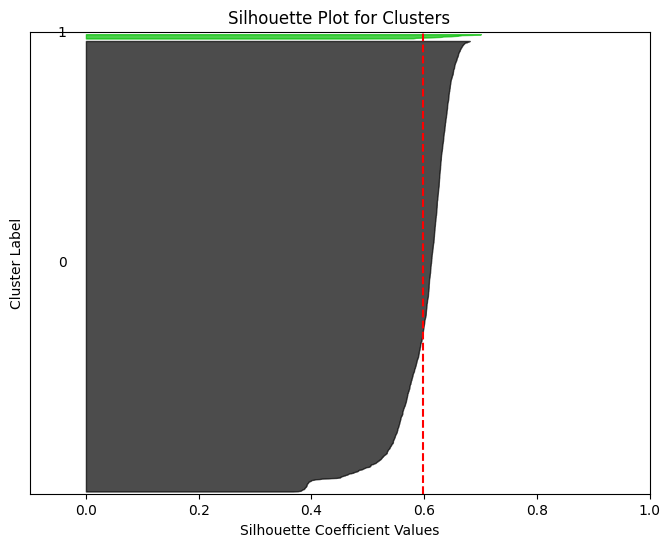

In [17]:
# @title Silhouette Analysis of the cluster
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

# Silhouette score for the entire dataset
silhouette_avg = silhouette_score(processed_data, agglo_labels)
print(f"Overall Silhouette Score: {silhouette_avg:.3f}")

# Silhouette plot for individual clusters
cluster_labels = agglo_labels
n_clusters = len(np.unique(cluster_labels))

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim([-0.1, 1])
ax.set_ylim([0, len(processed_data) + (n_clusters + 1) * 10])

# Compute silhouette scores for each sample
sample_silhouette_values = silhouette_samples(processed_data, cluster_labels)

y_lower = 10
for i in range(n_clusters):
    # Aggregate silhouette scores for samples in cluster i
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, ith_cluster_silhouette_values,
                     facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with cluster numbers
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10  # 10 for the 0 samples

ax.set_title("Silhouette Plot for Clusters")
ax.set_xlabel("Silhouette Coefficient Values")
ax.set_ylabel("Cluster Label")
ax.axvline(x=silhouette_avg, color="red", linestyle="--")  # Average silhouette score
ax.set_yticks([])  # Clear y-axis labels
plt.show()

In [18]:
# @title Cluster Stability
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score

# Function to check cluster stability
def check_cluster_stability(data, n_iterations=10):
    stability_scores = []
    for _ in range(n_iterations):
        # Resample the data
        sample = resample(data, replace=True, random_state=42)

        # Fit the clustering model on the resampled data
        agglo = AgglomerativeClustering(n_clusters=2, linkage='complete')
        labels = agglo.fit_predict(sample)

        # Compare with original labels using Adjusted Rand Index
        if len(np.unique(labels)) > 1:  # Ensure at least 2 clusters
            score = adjusted_rand_score(agglo_labels, labels)
            stability_scores.append(score)

    return np.mean(stability_scores)

# Check stability
stability_score = check_cluster_stability(processed_data)
print(f"Cluster Stability Score: {stability_score:.3f}")

Cluster Stability Score: -0.010


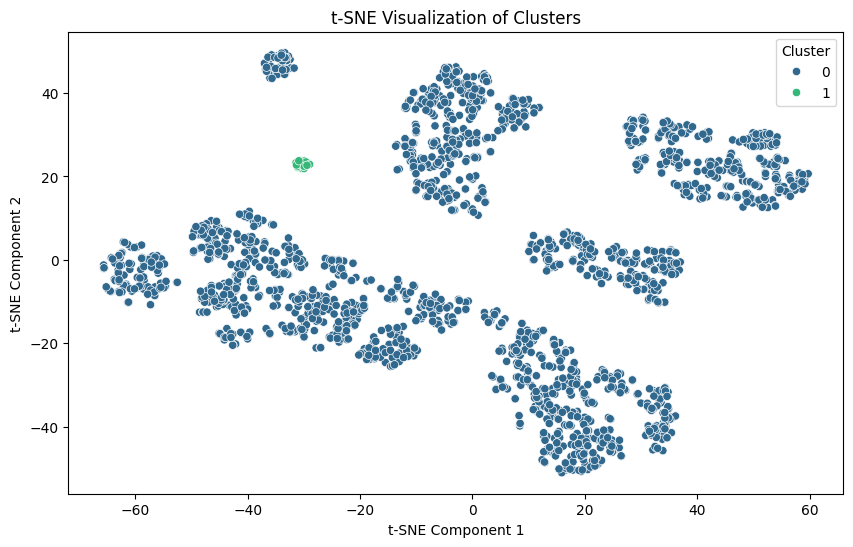

In [19]:
# @title Visual Validation (t-SNE)
from sklearn.manifold import TSNE

# Reduce to 2D using t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
data_tsne = tsne.fit_transform(processed_data)

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_tsne[:, 0], y=data_tsne[:, 1], hue=agglo_labels, palette='viridis', legend='full')
plt.title("t-SNE Visualization of Clusters")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title='Cluster')
plt.show()

In [20]:
# @title Statistical Tests to Validate Cluster Differences
from scipy.stats import ttest_ind, chi2_contingency

# Separate the data into two clusters
cluster_0 = df[df['Cluster'] == 0]
cluster_1 = df[df['Cluster'] == 1]

# Perform t-tests for numerical features
numerical_features = ['Income', 'Kids', 'Days_as_client', 'Recency', 'Expenses', 'TotalNumPurchases']
print("Numerical Features - T-Test Results:")
for feature in numerical_features:
    t_stat, p_value = ttest_ind(cluster_0[feature], cluster_1[feature])
    print(f"{feature}: t-stat = {t_stat:.3f}, p-value = {p_value:.3f}")

# Perform chi-square tests for categorical features
categorical_features = ['Complain', 'Response', 'Education_Postgraduate', 'Education_Undergraduate', 'Marital_Status_Single']
print("\nCategorical Features - Chi-Square Test Results:")
for feature in categorical_features:
    contingency_table = pd.crosstab(df['Cluster'], df[feature])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    print(f"{feature}: chi2 = {chi2:.3f}, p-value = {p_value:.3f}")

Numerical Features - T-Test Results:
Income: t-stat = 1.326, p-value = 0.185
Kids: t-stat = -1.183, p-value = 0.237
Days_as_client: t-stat = -1.349, p-value = 0.178
Recency: t-stat = -0.344, p-value = 0.731
Expenses: t-stat = 1.585, p-value = 0.113
TotalNumPurchases: t-stat = 0.801, p-value = 0.423

Categorical Features - Chi-Square Test Results:
Complain: chi2 = 1915.475, p-value = 0.000
Response: chi2 = 0.000, p-value = 1.000
Education_Postgraduate: chi2 = 3.680, p-value = 0.055
Education_Undergraduate: chi2 = 0.000, p-value = 1.000
Marital_Status_Single: chi2 = 0.019, p-value = 0.889


In [21]:
# @title Generate Random Seeds Using My Name
import random
import hashlib

def md5_hash(input_string):
    """Generates an MD5 hash from a given string."""
    md5_hasher = hashlib.md5()
    md5_hasher.update(input_string.encode('utf-8'))
    return md5_hasher.hexdigest()

# Generate seeds for 5 different input strings
input_strings = ["Aditya", "DataScience", "Clustering", "CustomerAnalysis", "SeedTest"]
seeds = []

for input_string in input_strings:
    hashed_value = md5_hash(input_string)
    number = int(hashed_value, 16)
    seeds.append(number)

print("Generated Seeds:", seeds)

Generated Seeds: [15925810616543313742210447360872871990, 74508039276141891028523314549700194730, 295390772695087633733277540233776948924, 116895274213901401852432352806844137515, 314941434084005427967419406254920592132]


In [22]:
# @title Run Clustering with Different Seeds
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Store results for each seed
results = []

for seed in seeds:
    print(f"\nRunning clustering with seed: {seed}")
    random.seed(seed)

    # Perform clustering
    agglo = AgglomerativeClustering(n_clusters=2, linkage='complete')
    labels = agglo.fit_predict(processed_data)

    # Evaluate clustering
    silhouette_avg = silhouette_score(processed_data, labels)
    print(f"Silhouette Score: {silhouette_avg:.3f}")

    # Save results
    results.append({
        'seed': seed,
        'labels': labels,
        'silhouette_score': silhouette_avg
    })


Running clustering with seed: 15925810616543313742210447360872871990
Silhouette Score: 0.598

Running clustering with seed: 74508039276141891028523314549700194730
Silhouette Score: 0.598

Running clustering with seed: 295390772695087633733277540233776948924
Silhouette Score: 0.598

Running clustering with seed: 116895274213901401852432352806844137515
Silhouette Score: 0.598

Running clustering with seed: 314941434084005427967419406254920592132
Silhouette Score: 0.598


In [23]:
# @title Compare Results Across Seeds
# Compare labels across seeds
from sklearn.metrics import adjusted_rand_score

# Compare each pair of clustering results
for i in range(len(results)):
    for j in range(i + 1, len(results)):
        labels_i = results[i]['labels']
        labels_j = results[j]['labels']

        # Calculate Adjusted Rand Index (ARI) to compare clusterings
        ari = adjusted_rand_score(labels_i, labels_j)
        print(f"Seed {results[i]['seed']} vs Seed {results[j]['seed']}: ARI = {ari:.3f}")

# Compare silhouette scores
print("\nSilhouette Scores Across Seeds:")
for result in results:
    print(f"Seed {result['seed']}: Silhouette Score = {result['silhouette_score']:.3f}")

Seed 15925810616543313742210447360872871990 vs Seed 74508039276141891028523314549700194730: ARI = 1.000
Seed 15925810616543313742210447360872871990 vs Seed 295390772695087633733277540233776948924: ARI = 1.000
Seed 15925810616543313742210447360872871990 vs Seed 116895274213901401852432352806844137515: ARI = 1.000
Seed 15925810616543313742210447360872871990 vs Seed 314941434084005427967419406254920592132: ARI = 1.000
Seed 74508039276141891028523314549700194730 vs Seed 295390772695087633733277540233776948924: ARI = 1.000
Seed 74508039276141891028523314549700194730 vs Seed 116895274213901401852432352806844137515: ARI = 1.000
Seed 74508039276141891028523314549700194730 vs Seed 314941434084005427967419406254920592132: ARI = 1.000
Seed 295390772695087633733277540233776948924 vs Seed 116895274213901401852432352806844137515: ARI = 1.000
Seed 295390772695087633733277540233776948924 vs Seed 314941434084005427967419406254920592132: ARI = 1.000
Seed 116895274213901401852432352806844137515 vs Seed 3

In [24]:
# @title Save the Results
# Save the clustered data to a new CSV file
df.to_csv('clustered_data.csv', index=False)

print("Clustered data saved to 'clustered_data.csv'.")

Clustered data saved to 'clustered_data.csv'.
